In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


## Generate Synthetic Data for Regression

In [2]:
np.random.seed(42)
N = 50000
c = 3
X = 2 * np.random.rand(N, c)  # Three independent variables
coeffs = np.array([-3, 2.5, -2])  # True coefficients for multiple regression
y = X.dot(coeffs) + np.random.randn(N) * 2  # Adding Gaussian noise

In [3]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Step 2: Implement and Train Models
lr_simple = LinearRegression()

In [5]:
lr_simple.fit(X_train[:, [0]], y_train)

LinearRegression()

In [6]:

y_pred_simple = lr_simple.predict(X_test[:, [0]])

In [7]:
lr_multi = LinearRegression()
lr_multi.fit(X_train, y_train)
y_pred_multi = lr_multi.predict(X_test)

In [8]:
# Ridge Regression (L2 Regularization)

ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [9]:
# Lasso Regression (L1 Regularization)

lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

## Evaluate Model Performance

In [10]:

def evaluate_model(model_name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"MSE: {mse:.4f}")
    print(f"R-squared: {r2:.4f}\n")

In [11]:
evaluate_model("Simple Linear Regression", y_test, y_pred_simple)
evaluate_model("Multiple Linear Regression", y_test, y_pred_multi)
evaluate_model("Ridge Regression", y_test, y_pred_ridge)
evaluate_model("Lasso Regression", y_test, y_pred_lasso)

Simple Linear Regression Performance:
MSE: 7.4152
R-squared: 0.2926

Multiple Linear Regression Performance:
MSE: 3.8784
R-squared: 0.6300

Ridge Regression Performance:
MSE: 3.8784
R-squared: 0.6300

Lasso Regression Performance:
MSE: 6.1411
R-squared: 0.4141



## Checking for Assumptions for Lasso Regression

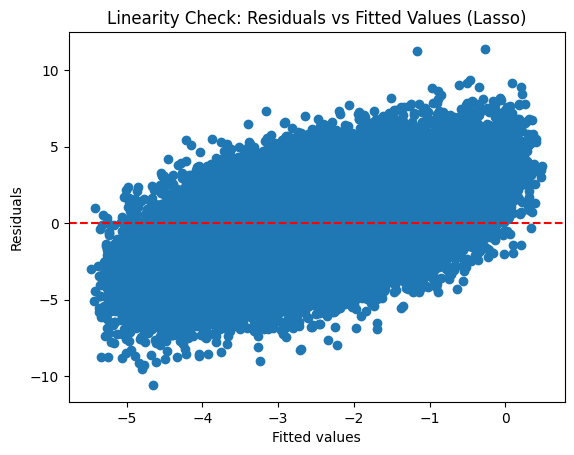

In [12]:
# 1. Linearity Check (Plot Residuals vs Fitted Values)
y_train_pred = lasso.predict(X_train)
residuals = y_train - y_train_pred
plt.scatter(y_train_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Linearity Check: Residuals vs Fitted Values (Lasso)")
plt.show()

In [13]:
# 2. Normality of Residuals (Shapiro-Wilk Test)
shapiro_test = shapiro(residuals)
print(f"Shapiro-Wilk Test for Normality: p-value = {shapiro_test.pvalue:.4f}")

Shapiro-Wilk Test for Normality: p-value = 0.3021


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 40000.
  res = hypotest_fun_out(*samples, **kwds)


### Shapiro Wilk Test Meaning
Null Hypothesis (H₀): The data follows a normal distribution.

Alternative Hypothesis (H₁): The data does not follow a normal distribution.

p-value = 0.3021 (Greater than 0.05)
Since the value of the Shapiro Wil Test(p) is greater than 0.05, we fail to reject the null hypothesis, meaning our distribution is normally distributed

Linear regression assumes that residuals (errors) are normally distributed.
Since the Shapiro-Wilk test suggests normality (p = 0.3021), this means the model's predictions are likely reliable.

In [14]:
# 3. Multicollinearity Check (Variance Inflation Factor - VIF)
X_train_const = sm.add_constant(X_train)
vif_data = pd.DataFrame()
vif_data["Feature"] = ["const"] + [f"X{i+1}" for i in range(X_train.shape[1])]
vif_data["VIF"] = [variance_inflation_factor(X_train_const, i) for i in range(X_train_const.shape[1])]
print("\nVariance Inflation Factor (VIF) for Multicollinearity:")
print(vif_data)


Variance Inflation Factor (VIF) for Multicollinearity:
  Feature        VIF
0   const  10.033986
1      X1   1.000092
2      X2   1.000039
3      X3   1.000068


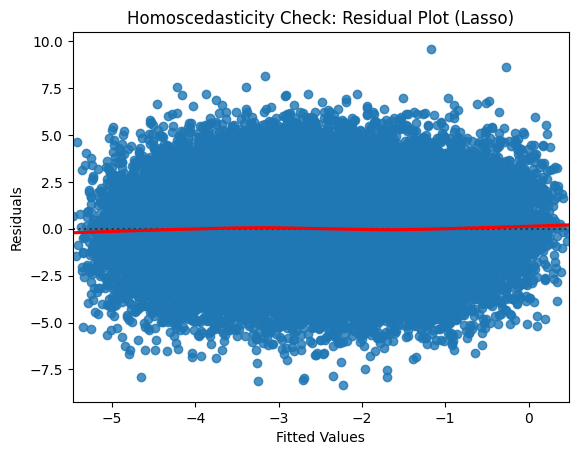

In [25]:
# 4. Homoscedasticity Check (Plot Residuals)
sns.residplot(x=y_train_pred, y=residuals, lowess=True, line_kws={"color": "red"})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check: Residual Plot (Lasso)")
plt.show()


Random Forest Model

In [16]:
#Initializing Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [17]:
#Train Random Forest Model and Making Predictions
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

Decision Tree Model

In [18]:
#Initializing Decision Tree Model
dt = DecisionTreeRegressor(random_state=42)

In [19]:
#Train Decision Tree Model and Making Predictions
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


Support Vector Machine (SVM) Model


In [20]:
#Initializing Support Vector Machine (SVM) Model
svm = SVR(kernel='rbf')

In [21]:
#Train Support Vector Machine (SVM) Modele and Making Predictions
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

Evaluating the Model

In [22]:
# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MSE: {mse:.4f}, R2 Score: {r2:.4f}")

In [23]:
# Evaluate models
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_svm, "SVM")

Random Forest - MSE: 4.3340, R2 Score: 0.5865
Decision Tree - MSE: 8.0997, R2 Score: 0.2273
SVM - MSE: 3.8807, R2 Score: 0.6298


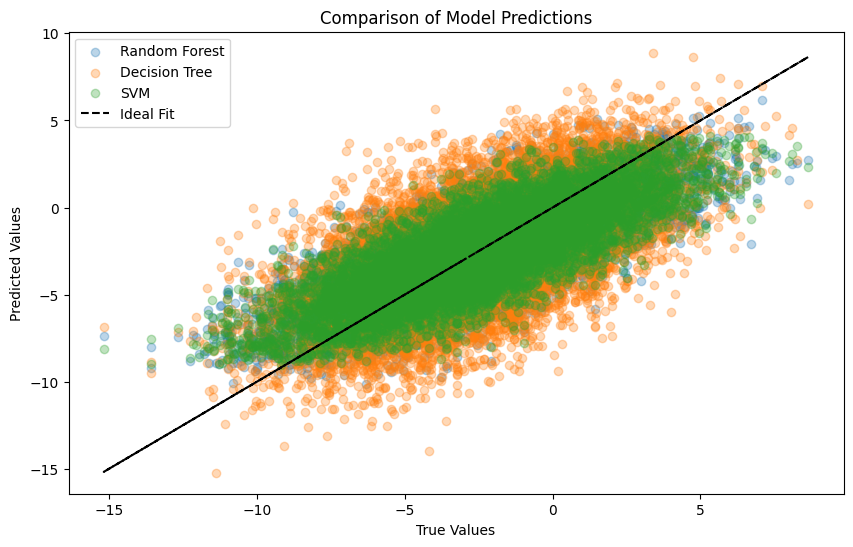

In [26]:
# Plot predictions vs true values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.3, label='Random Forest')
plt.scatter(y_test, y_pred_dt, alpha=0.3, label='Decision Tree')
plt.scatter(y_test, y_pred_svm, alpha=0.3, label='SVM')
plt.plot(y_test, y_test, color='black', linestyle='dashed', label='Ideal Fit')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.title("Comparison of Model Predictions")
plt.show()